In [1]:
import sys
import os

sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set up plotting
plt.style.use('default')
sns.set_palette('husl')

print('Basic imports successful')
print(f'Current working directory: {os.getcwd()}')
print(f'Python version: {sys.version}')

Basic imports successful
Current working directory: /Users/alugo/Desktop/regional-music-data/notebooks
Python version: 3.9.23 (main, Jun  5 2025, 08:49:36) 
[Clang 14.0.6 ]


In [2]:
try:
    from config import CITIES, REGIONS, AUDIO_FEATURES
    print('Configuration imported successfully!')
    print(f'Number of cities: {len(CITIES)}')
    print(f'Number of regions: {len(REGIONS)}')
    print(f'Audio features: {AUDIO_FEATURES}')
except ImportError as e:
    print(f'Configuration import failed: {e}')

Configuration imported successfully!
Number of cities: 19
Number of regions: 5
Audio features: ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'speechiness', 'tempo', 'loudness']


In [3]:
try:
    from data_collection import test_spotify_connection
    print('Testing Spotify API connection...')
    success = test_spotify_connection()

    if success:
        print('\n Ready to start data collection.')
    else:
        print('Check your API credentials in .env file')
except ImportError as e:
    print(f'Could not import data collection module: {e}')

Testing Spotify API connection...
Spotify API connection successful!
   Test track: 'Test Drive - From How To Train Your Dragon Music From The Motion Picture' by John Powell

 Ready to start data collection.


In [5]:
import pandas as pd

city_data=[]
for region, cities in REGIONS.items():
    for city in cities:
        city_data.append({'City':city, 'Region':region})

cities_df = pd.DataFrame(city_data)

print('Cities by Region:')
print('='*40)

for region in cities_df['Region'].unique():
    region_cities = cities_df[cities_df['Region'] == region]['City'].tolist()
    print(f'\n {region}:')
    for city in region_cities:
        print(f'   • {city}')

print(f'\n Total Cities: {len(cities_df)}')
cities_df

Cities by Region:

 West Coast:
   • Los Angeles
   • San Francisco
   • Seattle
   • Portland

 South:
   • Nashville
   • Austin
   • Atlanta
   • Miami
   • New Orleans

 Midwest:
   • Chicago
   • Detroit
   • Minneapolis
   • Kansas City

 Northeast:
   • New York
   • Boston
   • Philadelphia

 Mountain/Desert:
   • Denver
   • Phoenix
   • Salt Lake City

 Total Cities: 19


,City,Region
0,Los Angeles,West Coast
1,San Francisco,West Coast
2,Seattle,West Coast
3,Portland,West Coast
4,Nashville,South
5,Austin,South
6,Atlanta,South
7,Miami,South
8,New Orleans,South
9,Chicago,Midwest


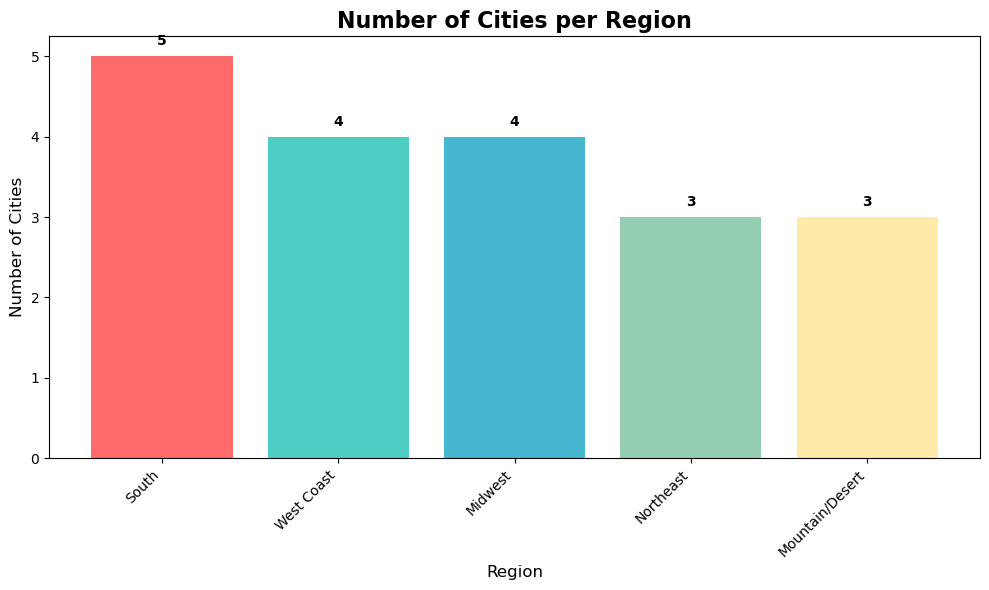

Region distribution:
   South: 5 cities
   West Coast: 4 cities
   Midwest: 4 cities
   Northeast: 3 cities
   Mountain/Desert: 3 cities


In [6]:
import matplotlib.pyplot as plt

region_counts = cities_df['Region'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(region_counts.index, region_counts.values,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])

plt.title('Number of Cities per Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.xticks(rotation=45, ha='right')

for bar, value in zip(bars, region_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f'Region distribution:')
for region, count in region_counts.items():
    print(f"   {region}: {count} cities")

In [7]:
audio_features_info = {
    'danceability': 'How suitable a track is for dancing (0.0 to 1.0)',
    'energy': 'Perceptual measure of intensity and activity (0.0 to 1.0)',
    'valence': 'Musical positivity conveyed by a track (0.0 to 1.0)',
    'acousticness': 'Whether the track is acoustic (0.0 to 1.0)',
    'instrumentalness': 'Predicts whether a track contains no vocals (0.0 to 1.0)',
    'speechiness': 'Detects the presence of spoken words (0.0 to 1.0)',
    'tempo': 'Overall estimated tempo in beats per minute (BPM)',
    'loudness': 'Overall loudness of a track in decibels (typically -60 to 0 db)'
}

print('Spotify Audio Features Ill Analyze:')
print('='*50)

for feature, description in audio_features_info.items():
    print(f'\n {feature.upper()}:')
    print(f'   {description}')

print(f'Total features: {len(AUDIO_FEATURES)}')

Spotify Audio Features Ill Analyze:

 DANCEABILITY:
   How suitable a track is for dancing (0.0 to 1.0)

 ENERGY:
   Perceptual measure of intensity and activity (0.0 to 1.0)

 VALENCE:
   Musical positivity conveyed by a track (0.0 to 1.0)

 ACOUSTICNESS:
   Whether the track is acoustic (0.0 to 1.0)

 INSTRUMENTALNESS:
   Predicts whether a track contains no vocals (0.0 to 1.0)

 SPEECHINESS:
   Detects the presence of spoken words (0.0 to 1.0)

 TEMPO:
   Overall estimated tempo in beats per minute (BPM)

 LOUDNESS:
   Overall loudness of a track in decibels (typically -60 to 0 db)
Total features: 8


In [8]:
next_steps = [
    "1. Collect sample data from Spotify for 2-3 cities",
    "2. Explore the structure of audio features data",
    "3. Analyze patterns in the sample data",
    "4. Create initial visualizations",
    "5. Scale up to all cities",
    "6. Apply machine learning for regional clustering",
    "7. Write cultural analysis and final article"
]

print('Project Roadmap:')
print('='*30)

for step in next_steps:
    print(step)

print('\n Environment setup complete! Ready for data collection')

Project Roadmap:
1. Collect sample data from Spotify for 2-3 cities
2. Explore the structure of audio features data
3. Analyze patterns in the sample data
4. Create initial visualizations
5. Scale up to all cities
6. Apply machine learning for regional clustering
7. Write cultural analysis and final article

 Environment setup complete! Ready for data collection
